In [1]:
#Bitte ausführen, damit alles Notwendige importiert wird
#Note: Bei Änderungen der zugrundeliegenden Python-Files muss Jupyter neugestartet werden
import scipro

In [2]:
%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">


# Scientific Programming Lab

- Mathmatische Inhalte
  - Funktionen
  - Ableitung und Ableitungsregeln
      - Faktorregel
      - Potenzregel
      - Summenregel
      - Produktregel
      - Kettenregel
- Informatische Inhalte
  - Fortgeschrittene Konzepte der Vererbung und Objektorientierung
      - Mehrfachvererbung und Mixins
      - Interne Attribute
      - Datenklassen und Deep Copy
      - Typhinweise
      - Statische Methoden
      - Klassenmethoden
      - Abstrakte Basisklassen

### Aufrufbare Klassen

Die *magische* Methode `__call__` erlaubt es, Klassen wie Funktionen aufzurufen.

In [3]:
class Incrementer():
    def __init__(self, inc_amount: float):
        self.inc_amount = inc_amount
    
    def __call__(self, x: float):
        return x + self.inc_amount

i7 = Incrementer(7)
print(f"i7(3)={i7(3)}")

i10 = Incrementer(10)
print(f"i10(3)={i10(3)}")

print(f"i10(i7(3))={i10(i7(3))}")

i7(3)=10
i10(3)=13
i10(i7(3))=20


## Funktionen und Ableitungen

<div class="definition">
    <h3>(Mathematische) Funktion</h3>
    <img src="images/x_squared.png" width=220 align=right alt="selfmade" />
    Eine Funktion ist eine Abbildung einer Ausgangsmenge $\mathbb{M}$ auf eine Zielmenge $\mathbb{N}$.<br>
    Diese Abbildung ordnet jedem Element der Ausgangsmenge  eindeutig ein Element auf der Zielmenge zu.<br>
    Wir nennen die Ausgangsmenge auch <em>Definitionsbereich/Eingabewerte</em> und die Zielmenge <em>Zielbereich/Funktionswerte</em>.<br>
    Eine Funktion wird mittels der beiden Mengen sowie einer Zuordnungsvorschrift definiert, z.B. beschreibt<br>
    $$f(x): \mathbb{R} \rightarrow \mathbb{R}, f(x)=x^2$$  <br>
    die Funktion, die jeder reellen Zahl ihr Quadrat zuordnet.
</div>

### Plottable-Mixin

Funktionen lassen sich als **Funktionsgraph** im Koordinatensystem visualisieren.

Dazu verwenden wir `Plottable`, ein *Mixin* für aufrufbare Klassen.

In [4]:
import matplotlib.pyplot as plt
import math

class Plottable():

    def sample(self, minimum : float, maximum : float, samples : int) -> [float]:
        sample_list = [self(minimum + (i / (samples -1.0) * (maximum - minimum))) for i in range(0, samples)]
        return sample_list


    @staticmethod
    def _get_x_values(minimum : float, maximum : float, samples : int) -> [float]:
        return [minimum + (i / (samples - 1.0) * (maximum - minimum)) for i in range(0, samples)]
    
    @staticmethod
    def multi_plot(plottables : [], minimum : float, maximum : float, samples : int = 100) -> None:
        plt.figure(figsize=(8, 6))
        x = Plottable._get_x_values(minimum, maximum, samples)
        for plottable in plottables:
            y = plottable.sample(minimum, maximum, samples)
            plt.plot(x, y, label=f"{plottable}")
        Plottable._configure_plot_and_show()

    def plot(self, minimum : float, maximum : float, samples : int = 100) -> None: 
        x = Plottable._get_x_values(minimum, maximum, samples)
        y = self.sample(minimum, maximum, samples)
        plt.plot(x, y, label=f"{self}")
        Plottable._configure_plot_and_show()

    @staticmethod
    def _configure_plot_and_show() -> None:
        # Axes and labels
        plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
        plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
        plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

### Ableitung

<div class="definition">
    <img src="images/differencial_quotient_of_a_function.png" width=320 align=right alt="https://commons.wikimedia.org/wiki/File:Differencial_quotient_of_a_function.svg" />
    <h3>Ableitung einer Funktion</h3>
    Die Ableitung beschreibt die Änderungsrate des Funktionswert bezogen auf den Eingabewert.<br>
    Geometrisch veranschaulicht ist sie die Steigung der Tangente der Funktion an einem Punkt.<br>
    Sie ist definiert durch den Limes des <em>Differenzenquotienten</em>:<br>
    $$f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$  <br>
</div>

Das untenstehende Beispiel zeigt die Ableitung von $f(x)=x^2$ an drei Punkten mittels Tangenten.

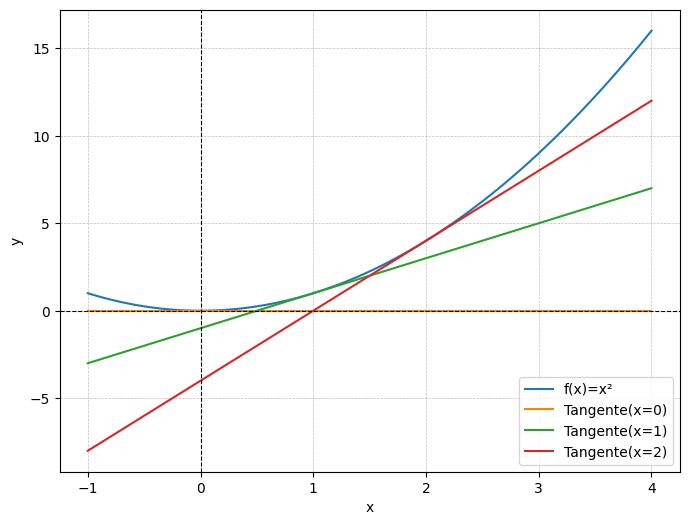

In [5]:
class QuadratF(Plottable):
    def __str__(self):
        return "f(x)=x²"
    def __call__(self, x : float):
        return x ** 2

class Tangent0(Plottable):
    def __str__(self):
        return "Tangente(x=0)"
    def __call__(self, x : float):
        return 0

class Tangent1(Plottable):
    def __str__(self):
        return "Tangente(x=1)"
    def __call__(self, x : float):
        return 2 * x - 1

class Tangent2(Plottable):
    def __str__(self):
        return "Tangente(x=2)"
    def __call__(self, x : float):
        return 4 * x - 4

Plottable.multi_plot([QuadratF(), Tangent0(), Tangent1(), Tangent2()], -1.0, 4.0)

### Abstrakte Basisklasse für Funktionen

Wir möchten im Folgenden verschiedene Funktionen von $\mathbb{R}$ auf $\mathbb{R}$ und deren Ableitungen implementieren. 

Dazu verwenden wir eine abstrakte Basisklasse `MFunc`. Sie enthält folgende Methoden und Attribute:

- <tt>\_\_init\_\_</tt> Konstruktor, der den Namen, einen konstanten Faktor, und den Variablennamen erhält.
- <tt>_factor_str</tt> Hilfsfunktion für das Formatieren von Faktoren (z.B. `-1x -> -x`).
- <tt>\_\_call\_\_</tt> gibt den Funktionswert für einen Eingabewert zurück.
- <tt>clone</tt> erzeugt eine *deep copy* der Funktion.
- <tt>call_verbose</tt> gibt einen schön formatierten Output für eine Funktionsberechnung.

<div class="satz">
    <h3>Faktorregel</h3>
    Ein konstanter Faktor bleibt bei der Ableitung erhalten:<br>
    $$ f(x)=c \cdot g(x), \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot g'(x)$$
</div>

Daher können wir den `factor` in der Basisklasse zentral behandeln.

Alle Unterklassen müssen folgende abstrakte Methoden implementieren:

- <tt>_str_internal(self) -> str</tt> gibt die Berechnungsvorschrift der Funktion (ohne den Faktor) zurück.
- <tt>_call_internal(self, x: float) -> float</tt> berechnet den Funktionswert (ohne den Faktor).
- <tt>derive(self) -> MFunc</tt> gibt die Ableitungsfunktion der Funktion zurück (keinen konkreten Wert!).

In [6]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import copy

class MFunc(ABC, Plottable):
    '''
    Abstrakte Basisklasse für Funktionen.
    '''
    def __init__(self, name: str = '', factor: float = 1.0, operand : str ="x"):
        '''
        Konstruktor mit Funktionsname (z.B. f), konstantem Faktor, und Operand.
        '''
        self.name = name
        self.factor = factor
        self.operand = operand

    def _factor_str(self, factor: float) -> str:
        '''
        Hilfsmethode, die einen Faktor in einen String umwandelt:
        Faktor 1.0 kann weggelassen werden.
        Faktor -1.0 kann als Minus geschrieben werden.
        Alle anderen Faktoren werden als Zahl angegeben.
        '''
        return f"{'' if factor == 1.0 else '-' if factor == -1.0 else factor}"
    
    @abstractmethod
    def _str_internal(self) -> str:
        '''
        Wandelt die eigentliche Funktion in einen String um, ohne Faktor und Funktionssymbol.
        z.B. __str__: f(x)=3.0cos(x) -> _str_internal: cos(x)
        '''
        pass

    def __str__(self) -> str:
        '''
        Wandelt die Funktion in einen menschenlesbaren String um.
        '''
        return f"{self.name}({self.operand})={self._str_internal()}"

    @abstractmethod
    def _call_internal(self, x: float) -> float:
        '''
        Berechnet die eigentliche Funktion ohne Faktor.
        Ein Error wird als NaN (not a number) interpretiert.
        '''
        pass
    
    def __call__(self, x: float) -> float:
        '''
        Berechnet den Funktionswert an Stelle x.
        '''
        result = 0
        try:
            result = self._call_internal(x)
        except: #z.B. durch Teilen durch Null
            print(f"Error at {self} {x}")
            return math.nan
        return self.factor * result

    @abstractmethod
    def derive(self):
        '''
        Gibt die Ableitungsfunktion dieser FUnktion zurück.
        '''
        pass

    def clone(self):
        '''
        Erzeugt eine Kopie der funktion und aller ihrer Attribute.
        '''
        return copy.deepcopy(self)
    
    def call_verbose(self, x: float):
        '''
        Berechnet den Funktionswert an Stelle x und gibt ihn schön als String formatiert zurück.
        '''
        return f"{self.name}({x})={self(x)}"

### Konstante Funktionen

`ConstFunc` ist ein Beispiel für eine Unterklasse. Sie beschreibt Funktionen mit konstantem Funktionswert.

Die Ableitung einer solchen Funktion hat ebenfalls einen konstanten Funktionswert:


<div class="satz">
    <h3>Konstantenregel</h3>
    Ein konstanter Faktor fällt bei der Ableitung weg:<br>
    $$ f(x)=c, \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = 0$$
</div>



In [7]:
import unittest

class ConstFunc(MFunc):

    def _str_internal(self) -> str:
        return f"{self.factor}"

    def _call_internal(self, x: float) -> float:
        '''
        Gibt immer 1 zurück, der Faktor kommt später hinzu.
        '''
        return 1

    def derive(self):
        return ConstFunc(self.name + "'", 0.0, self.operand)

class TestConstFunc(unittest.TestCase):
    """
    Unittests für die konstante Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = ConstFunc("f", 1.0)
        self.g  = ConstFunc("g", 3.5)
        self.h  = ConstFunc("h", -2.0, 'y')
        self.k  = ConstFunc("k", 0.0)

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(1.0), 1.0)
        self.assertAlmostEqual(self.f(-10.0), 1.0)
        self.assertAlmostEqual(self.g(0.0), 3.5)
        self.assertAlmostEqual(self.h(0.0), -2.0)
        self.assertAlmostEqual(self.k(11.5), 0.0)

    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),'f(x)=1.0')
        self.assertEqual(str(self.g),'g(x)=3.5')
        self.assertEqual(str(self.h),'h(y)=-2.0')
        self.assertEqual(str(self.k),'k(x)=0.0')

    def test_03_derive(self):
        """
        Testet Ableitung.
        """
        fd= self.f.derive()
        hd= self.h.derive()
        self.assertTrue(type(fd) is ConstFunc)
        self.assertEqual(fd.factor, 0.0)
        self.assertEqual(fd.operand, 'x')
        self.assertEqual(str(fd), "f'(x)=0.0")
        self.assertTrue(type(hd) is ConstFunc)
        self.assertEqual(hd.factor, 0.0)
        self.assertEqual(hd.operand, 'y')
        self.assertEqual(str(hd), "h'(y)=0.0")


if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestConstFunc("test_01_call"))
    suite.addTest(TestConstFunc("test_02_str"))
    suite.addTest(TestConstFunc("test_03_derive"))

    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


Nun können wir die Klasse ausprobieren.

c(x)=7.0 c(2.0)=7.0
c'(x)=0.0 c'(5.0)=0.0


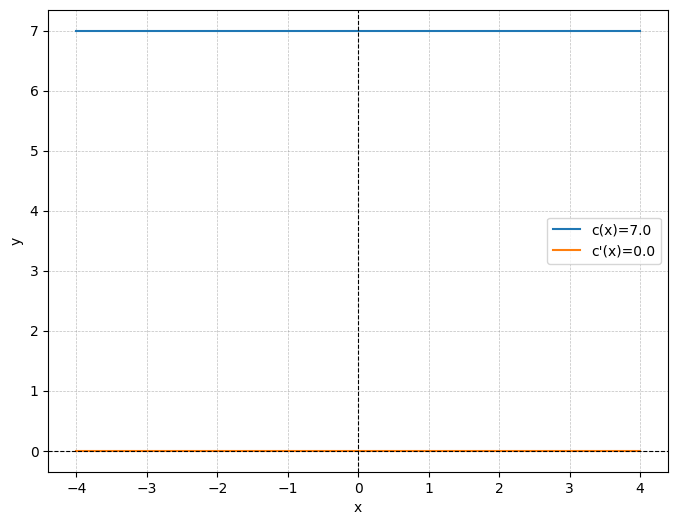

In [8]:
c = ConstFunc("c", 7.0)
cd = c.derive()
print(c, c.call_verbose(2.0))
print(cd, cd.call_verbose(5.0))

Plottable.multi_plot([c, cd], -4.0, 4.0)

### $e$-Funktion

<div class="definition">
    <h3>Eulersche Zahl und $e$-Funktion</h3>
    <img src="images/exp_x.png" width=260 align=right alt="selfmade" />
    Die Eulersche Zahl ist wie folgt definiert:<br>
    $$  e = \lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n
    $$<br>
    Sie ist eine wichtige Größe der Mathematik und wird z.B. bei der Berechnung natürlichen Wachstums eingesetzt.<br>
    Basierend auf $e$ ist die natürliche Exponentialfunktion oder $e$-Funktion definiert:<br>
    $$ f(x) = e^x $$
</div>


    $$ 
    f(x) = e^x \rightarrow f'(x) = e^
    f(x)= e^{c \cdot x}, \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot e^{c \cdot x}
    $$


Wir möchten im Folgenden die $e$-Funktion als `ExpFunc` implementieren. Ein Teil der Implementierung ist bereits vorhanden. Auch die Eulersche Zahl steht als Konstante `math.e` bereits zur Verfügung.

<div class="aufgabe">
    <h3>$e$-Funktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>ExpFunc</tt>.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Funktionen sind zu ergänzen:
    <ul>
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion unter Berücksichtigung des <tt>exp_factor</tt> (wie $c$ in obiger Formel).
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Geben Sie die Ableitung als neue <tt>ExpFunc</tt> mit korrekten Faktoren zurück.
    </li>
    </ul>
</div>

In [23]:
import math
import unittest

class ExpFunc(MFunc):
    
    def __init__(self, name: str = '', factor: float = 1.0, exp_factor: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.exp_factor = exp_factor
        
    def _str_internal(self) -> str:
        exponent = f"{self._factor_str(self.exp_factor)}{self.operand}"
        if(abs(self.exp_factor) != 1.0 or len(self.operand) > 1):
            if not isinstance(exponent, SumFunc):
                exponent = f"({exponent})"
        return f"{self._factor_str(self.factor)}e^{exponent}"

    def _call_internal(self, x: float) -> float:
        return math.pow(math.e, self.exp_factor*x)

    def derive(self) -> MFunc:
        return ExpFunc(self.name+"'", self.factor * self.exp_factor, self.exp_factor, self.operand)

class TestExpFunc(unittest.TestCase):
    """
    Unittests für die e-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = ExpFunc("f", 1.0)
        self.g  = ExpFunc("g", 2.0, 3.0)
        self.h  = ExpFunc("h", -1.0, -2.0, 'y')

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(0.0), 1.0)
        self.assertAlmostEqual(self.f(1.0), math.e)
        self.assertAlmostEqual(self.f(3.0), 20.085536923187664)
        self.assertAlmostEqual(self.g(2.0), 806.85758698547)
        self.assertAlmostEqual(self.g(-2.0), 0.004957504353332719)
        self.assertAlmostEqual(self.h(4.0), -0.00033546262790251196)
        self.assertAlmostEqual(self.h(-4.0), -2980.957987041727)

    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),'f(x)=e^x')
        self.assertEqual(str(self.g),'g(x)=2.0e^(3.0x)')
        self.assertEqual(str(self.h),'h(y)=-e^(-2.0y)')

    def test_03_derive(self):
        """
        Testet Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()
        self.assertTrue(type(fd) is ExpFunc)
        self.assertEqual(fd.name, "f'")
        self.assertEqual(fd.factor, 1.0)
        self.assertEqual(fd.exp_factor, 1.0)
        self.assertEqual(fd.operand, 'x')
        self.assertEqual(str(gd),"g'(x)=6.0e^(3.0x)")
        self.assertAlmostEqual(gd(2.5), 10848.254486736376)
        self.assertEqual(str(hd),"h'(y)=2.0e^(-2.0y)")
        self.assertAlmostEqual(hd(1.0), 0.2706705664732254)


if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestExpFunc("test_01_call"))
    suite.addTest(TestExpFunc("test_02_str"))
    suite.addTest(TestExpFunc("test_03_derive"))

    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


Auch diese Funktion können wir uns plotten lassen:

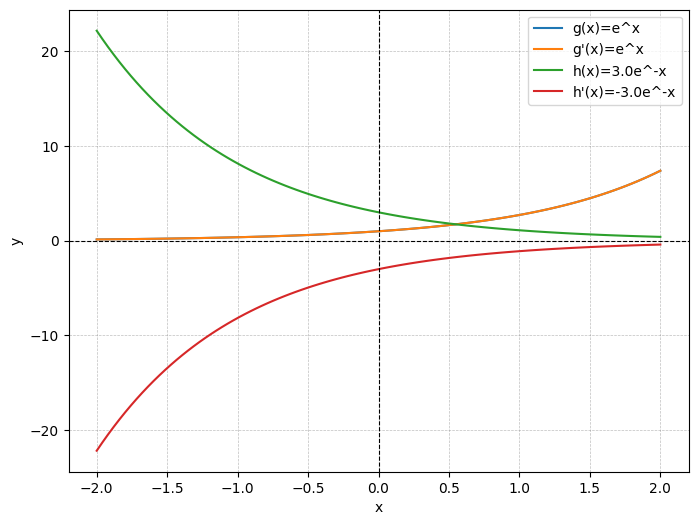

In [10]:
g = ExpFunc("g")
h = ExpFunc("h", 3.0, -1.0)

Plottable.multi_plot([g, g.derive(), h, h.derive()], -2, 2, 100)

### Sinus und Cosinus

Als nächstes möchten wir Funktionen für *Sinus* und *Cosinus* implementieren. Die eigentliche Berechnung müssen Sie nicht selbst vornehmen, `math.sin` und `math.cos` gibt es bereits.

<div class="satz">
    <h3>Ableitung von Sinus und Cosinus</h3>
    
    $$ f(x) = sin(x) \rightarrow f'(x) = cos(x)$$<br>
    $$ f(x) = sin(c \cdot x), \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot cos(c \cdot x)$$<br>
    $$ f(x) = cos(x) \rightarrow f'(x) = -sin(x)$$<br>
    $$ f(x) = cos(c \cdot x), \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot -sin(c \cdot x)$$
</div>

<div class="aufgabe">
    <h3>Sinus- und Cosinus-Funktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>SinFunc</tt>.<br>
    Erstellen Sie danach analog eine Klasse <tt>CosFunc</tt>.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!
</div>


In [24]:
import math
import unittest

class SinFunc(MFunc):

    def __init__(self, name: str = '', factor: float = 1.0, sin_factor: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.sin_factor = sin_factor
        
    def _str_internal(self) -> str:
        return f"{self._factor_str(self.factor)}sin({self._factor_str(self.sin_factor)}{self.operand})"

    def _call_internal(self, x: float) -> float:
        return math.sin(self.sin_factor * x)

    def derive(self) -> MFunc:
        return CosFunc(self.name + "'", self.factor * self.sin_factor, self.sin_factor, self.operand) 


class CosFunc(MFunc):

    def __init__(self, name: str = '', factor: float = 1.0, cos_factor: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.cos_factor = cos_factor
        
    def _str_internal(self) -> str:
        return f"{self._factor_str(self.factor)}cos({self._factor_str(self.cos_factor)}{self.operand})"

    def _call_internal(self, x: float) -> float:
        return math.cos(self.cos_factor * x)

    def derive(self) -> MFunc:
        return SinFunc(self.name + "'", (-1) * self.factor * self.cos_factor, self.cos_factor, self.operand) 


class TestSinCos(unittest.TestCase):
    """
    Unittests für die Sinus- und Cosinus-Funktionen.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.fs  = SinFunc("f", 1.0)
        self.gs  = SinFunc("g", 3.0, 2.0, 'y')
        self.fc  = CosFunc("f", 1.0, 1.0)
        self.gc  = CosFunc("g", -3.0, -2.0, 'y')

    def test_01_call_sin(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.fs(0.0), 0.0)
        self.assertAlmostEqual(self.fs(math.pi/2), 1.0)
        self.assertAlmostEqual(self.fs(math.pi), 0.0)
        self.assertAlmostEqual(self.fs(1.0), 0.8414709848078965)
        self.assertAlmostEqual(self.gs(0.0), 0.0)
        self.assertAlmostEqual(self.gs(-math.pi/2), 0.0)
        self.assertAlmostEqual(self.gs(-math.pi), 0.0)
        self.assertAlmostEqual(self.gs(1.0), 2.727892280477045)

    def test_02_call_cos(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.fc(0.0), 1.0)
        self.assertAlmostEqual(self.fc(math.pi/2), 0.0)
        self.assertAlmostEqual(self.fc(math.pi), -1.0)
        self.assertAlmostEqual(self.gc(1.0), 1.2484405096414273)
        

    def test_03_str_sin(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.fs),'f(x)=sin(x)')
        self.assertEqual(str(self.gs),'g(y)=3.0sin(2.0y)')

    def test_04_str_cos(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.fc),'f(x)=cos(x)')
        self.assertEqual(str(self.gc),'g(y)=-3.0cos(-2.0y)')
    
    def test_05_derive_once(self):
        """
        Testet Ableitung.
        """
        fsd= self.fs.derive()
        gsd= self.gs.derive()
        fcd= self.fc.derive()
        gcd= self.gc.derive()
        self.assertTrue(type(fsd) is CosFunc)
        self.assertEqual(fsd.factor, 1.0)
        self.assertEqual(fsd.cos_factor, 1.0)
        self.assertEqual(fsd.operand, 'x')
        self.assertEqual(fsd._str_internal(), self.fc._str_internal())
        self.assertEqual(str(gsd), "g'(y)=6.0cos(2.0y)")
        self.assertEqual(str(fcd), "f'(x)=-sin(x)")
        self.assertEqual(str(gcd), "g'(y)=-6.0sin(-2.0y)")

    def test_06_derive_multiple(self):
        fsd= self.fs.derive().derive().derive().derive()
        fcd= self.fc.derive().derive().derive().derive()
        self.assertEqual(str(fsd), "f''''(x)=sin(x)")
        self.assertEqual(str(fcd), "f''''(x)=cos(x)")

        gsd= self.gs.derive().derive()
        gcd= self.gc.derive().derive()
        self.assertEqual(str(gsd), "g''(y)=-12.0sin(2.0y)")
        self.assertEqual(str(gcd), "g''(y)=12.0cos(-2.0y)")

        

if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestSinCos("test_01_call_sin"))
    suite.addTest(TestSinCos("test_02_call_cos"))
    suite.addTest(TestSinCos("test_03_str_sin"))
    suite.addTest(TestSinCos("test_04_str_cos"))
    suite.addTest(TestSinCos("test_05_derive_once"))
    suite.addTest(TestSinCos("test_06_derive_multiple"))

    runner = unittest.TextTestRunner()
    runner.run(suite)


......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


Auch die Funktionsgraphen von Sinus und Cosinus lassen sich mittels Plottable zeichnen.

Leitet man $sin(x)$ viermal ab, ist das Ergebnis übrigens wieder $sin(x)$.

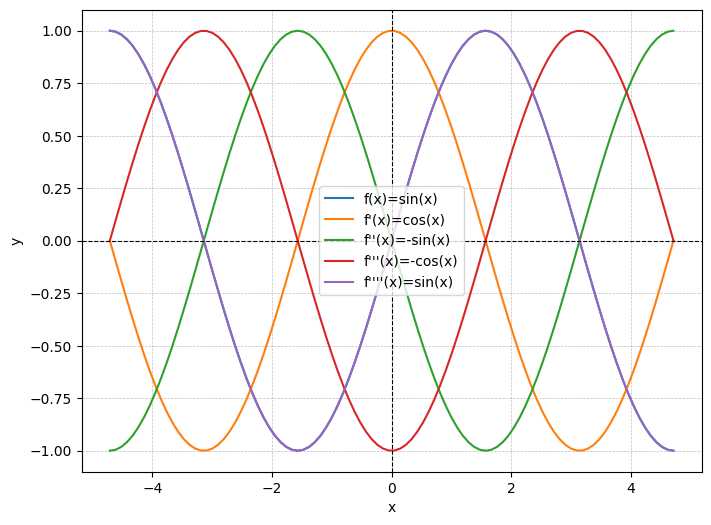

In [12]:
f = SinFunc("f")#, 1, 2
Plottable.multi_plot([f, 
                      f.derive(),
                      f.derive().derive(),
                      f.derive().derive().derive(),
                      f.derive().derive().derive().derive()],
                    -math.pi * 1.5, math.pi  * 1.5, 100)

### Potenzfunktion

Die nächsten Funktionen sind Potenzfunktionen, also Funktionen, in dem x mit einem Exponenten kombiniert wird, z.B. $x^3$.


<div class="satz">
    <h3>Potenzregel</h3>
    <img src="images/x_cubed.png" width=220 align=right alt="selfmade" />
    $$ f(x) = x^n, \text{ mit } n \in \mathbb{N}^{+} \rightarrow f'(x) = n \cdot x^{n-1}$$<br>
    Das heißt insbesondere:
    $$ f(x) = x \rightarrow f'(x) = 1 \cdot x^0 = 1 \cdot 1 = 1 $$<br>
</div>

<div class="aufgabe">
    <h3>Potenzfunktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>PowerFunc</tt>.<br>
    Beachten Sie, dass die Ableitung entweder eine Potenz- oder eine Konstantenfunktion sein kann.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!
</div>


In [34]:
import unittest

class PowerFunc(MFunc):
    
    def __init__(self, name: str = '', factor: float = 1.0, exponent: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.exponent = exponent
        
    def _str_internal(self) -> str:
        return f"{self._factor_str(self.factor)}{self.operand}{'' if self.exponent == 1 else f'^{self.exponent}'}"

    def _call_internal(self, x: float) -> float:
        #print("[DEBUG Power]", self._str_internal(self), x, self.exponent)
        return math.pow(x, self.exponent)

    def derive(self) -> MFunc:
        if self.exponent == 1: return ConstFunc(self.name + "'", self.factor, self.operand)
        return PowerFunc(self.name + "'", self.factor * self.exponent, self.exponent - 1, self.operand) 
    


class TestPowerFunc(unittest.TestCase):
    """
    Unittests für die Potenz-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = PowerFunc("f", 1.0, 2.0)
        self.g  = PowerFunc("g", -3.0, 1.0)
        self.h  = PowerFunc("h", 0.5, 3.0, 'y')

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(1.0), 1.0)
        self.assertAlmostEqual(self.f(3.0), 9.0)
        self.assertAlmostEqual(self.f(-2.5), 6.25)
        self.assertAlmostEqual(self.g(0.0), 0.0)
        self.assertAlmostEqual(self.g(2.0), -6.0)
        self.assertAlmostEqual(self.h(0.5), 0.0625)
        self.assertAlmostEqual(self.h(-1.5), -1.6875)
        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),'f(x)=x^2.0')
        self.assertEqual(str(self.g),'g(x)=-3.0x')
        self.assertEqual(str(self.h),'h(y)=0.5y^3.0')

    def test_03_derive_to_power(self):
        """
        Testet Ableitung auf eine andere Potenzfunktion.
        """
        fd= self.f.derive()
        hd= self.h.derive()
        hdd= hd.derive()

        self.assertTrue(type(fd) is PowerFunc)
        self.assertEqual(fd.factor, 2.0)
        self.assertEqual(fd.exponent, 1.0)
        self.assertEqual(fd.operand, 'x')
        self.assertEqual(str(fd), "f'(x)=2.0x")
        self.assertEqual(str(hd), "h'(y)=1.5y^2.0")
        self.assertEqual(str(hdd), "h''(y)=3.0y")

    def test_04_derive_to_const(self):
        """
        Testet Ableitung zur Konstantenfunktion.
        """
        gd= self.g.derive()
        gdd= self.g.derive().derive()
        fdd= self.f.derive().derive()
        self.assertTrue(type(gd) is ConstFunc)
        self.assertTrue(type(gdd) is ConstFunc)
        self.assertTrue(type(fdd) is ConstFunc)
        self.assertEqual(str(gd), "g'(x)=-3.0")
        self.assertEqual(str(gdd), "g''(x)=0.0")
        self.assertEqual(str(fdd), "f''(x)=2.0")

if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestPowerFunc("test_01_call"))
    suite.addTest(TestPowerFunc("test_02_str"))
    suite.addTest(TestPowerFunc("test_03_derive_to_power"))
    suite.addTest(TestPowerFunc("test_04_derive_to_const"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


Durch mehrfaches Ableiten lässt sich gut erkennen, wie der *Grad* (größter Exponent) der Funktion sinkt.

Error at f(x)=2x^3 -2.0
Error at f(x)=2x^3 -1.9595959595959596
Error at f(x)=2x^3 -1.9191919191919191
Error at f(x)=2x^3 -1.878787878787879
Error at f(x)=2x^3 -1.8383838383838385
Error at f(x)=2x^3 -1.797979797979798
Error at f(x)=2x^3 -1.7575757575757576
Error at f(x)=2x^3 -1.7171717171717171
Error at f(x)=2x^3 -1.6767676767676767
Error at f(x)=2x^3 -1.6363636363636362
Error at f(x)=2x^3 -1.595959595959596
Error at f(x)=2x^3 -1.5555555555555556
Error at f(x)=2x^3 -1.5151515151515151
Error at f(x)=2x^3 -1.4747474747474747
Error at f(x)=2x^3 -1.4343434343434343
Error at f(x)=2x^3 -1.393939393939394
Error at f(x)=2x^3 -1.3535353535353534
Error at f(x)=2x^3 -1.3131313131313131
Error at f(x)=2x^3 -1.2727272727272727
Error at f(x)=2x^3 -1.2323232323232323
Error at f(x)=2x^3 -1.191919191919192
Error at f(x)=2x^3 -1.1515151515151514
Error at f(x)=2x^3 -1.1111111111111112
Error at f(x)=2x^3 -1.0707070707070707
Error at f(x)=2x^3 -1.0303030303030303
Error at f(x)=2x^3 -0.9898989898989898
Error 

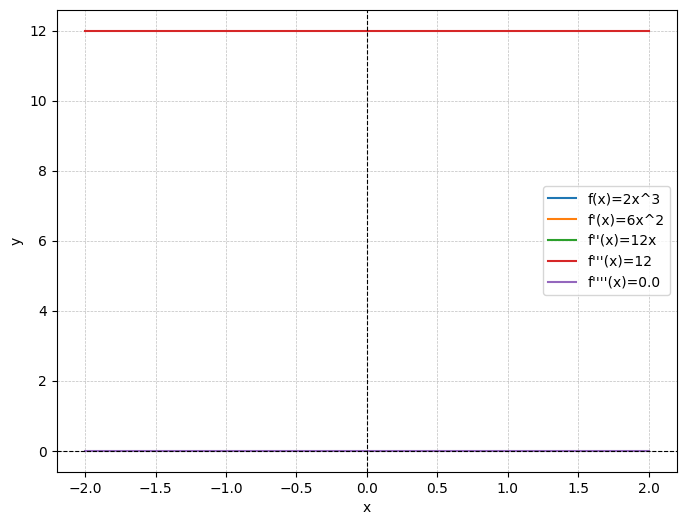

In [14]:
f = PowerFunc("f", 2, 3)
Plottable.multi_plot([f,
                      f.derive(),
                      f.derive().derive(),
                      f.derive().derive().derive(),
                      f.derive().derive().derive().derive()],
                    -2, 2)

### Summenregel

Viele Funktionen setzen sich aus mehreren der bisher implementierten Funktionen zusammen. Eine wichtige Klasse sind Polynome, also Funktionen der Form:

$$
f(x)= c_0 \cdot x^0 + c_1 \cdot x^1 + c_2 \cdot x^2 + ... + c_{n-1} \cdot x^{n-1} + c_{n} \cdot x^{n}, \text{ mit } c_{0 \ldots n} \in \mathbb{R}
$$

Für die Ableitung solche einer Funktion hilft eine neue Ableitungsregel.

$$ 
f(x) = (f_1{x} + f_2{x} + \ldots + f_n{x}) \rightarrow f'(x) = (f_1'{x} + f_2'{x} + \ldots + f_n'{x})
$$

Wir können also die Terme der Summe einfach einzeln ableiten.


<div class="aufgabe">
    <h3>Summen-Funktion</h3>
    <img src="images/x_plus_sin.png" width=260 align=right alt="selfmade" />
    Ergänzen Sie den untenstehenden Code der Klasse <tt>SumFunc</tt>, die eine Summe aus mehreren anderen Funktionen (<tt>terms</tt>) ist.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Vorgaben gelten:
    <ul>
    <li><tt>_str_internal(self) -> str</tt>: Wir umgeben die Summe mit Klammern, um später Punkt-vor-Strich nicht zu verletzen (z.B. <tt>(sin(x)+cos(x))</tt>)
    </li>    
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion durch Aufruf der einzelnen Terme.
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Terme mit Faktor 0 fallen weg. Hat die Ableitung nur einen Summanden, geben Sie diesen direkt als Ableitung zurück. Bleibt kein Term übrig, geben Sie eine passende Konstantenfunktion zurück.
    </li>
    </ul>
</div>

<details class="hint">
<summary></summary>
    Ob ein Plus oder Minus kommt, hängt vom Vorzeichen des Faktors ab.
    <details class="nexthint">
    <summary></summary>
       Bei der Ableitung fallen Terme mit Faktor 0.0 weg.
        <details class="nexthint">
        <summary></summary>
           Es gibt drei Fälle, welche Art von Func die Ableitung liefert, abhängig von der Anzahl der verbleibenden Terme.
        </details>
    </details>
</details>


In [28]:
import unittest

class SumFunc(MFunc):

    def __init__(self, name: str, terms: [MFunc]):
        super().__init__(name)
        self.terms = []
        for term in terms:
            self.terms.append(term.clone())
        #Bonus-Aufgabe
        
    def _str_internal(self) -> str:
        out = "("

        for i, ele in enumerate(self.terms):
            if ele.factor != 0:
                if ele.factor > 0 and i != 0: out += "+"
                out += ele._str_internal()

        return out + ")"

    def _call_internal(self, x: float) -> float:
        sum = 0
        for ele in self.terms:
            sum += ele(x)

        return sum

    def derive(self) -> MFunc:
        newTerms = []
        for ele in self.terms:
            if not ("0.0" in str(ele.derive())): newTerms.append(ele.derive())
        
        if len(newTerms) == 1: 
            if type(newTerms[0]) == ConstFunc: return ConstFunc(self.name + "'", newTerms[0].factor, newTerms[0].operand) 
            elif type(newTerms[0]) == PowerFunc: return PowerFunc(self.name + "'", newTerms[0].factor, newTerms[0].exponent, newTerms[0].operand)
        return SumFunc(self.name + "'", newTerms)
        
    def __len__(self):
        return len(self.terms)


class TestSumFunc(unittest.TestCase):
    """
    Unittests für die zusammengestzte Summen-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = SumFunc("f",[PowerFunc("", 1.0, 3.0), PowerFunc("", 1.0, 2.0), PowerFunc("", 1.0, 1.0)])
        self.g  = SumFunc("g",[PowerFunc("", 2.5, 2.0), PowerFunc("", -4.0, 1.0), ConstFunc("", 3.0)])
        self.h  = SumFunc("h", [SinFunc(), CosFunc("",3.0, 0.5), ConstFunc("", -1.0)])
        self.k  = SumFunc("k", [PowerFunc("", 1.0, 4.0), PowerFunc("", 5.0, 1.0)])

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(2.0), 14.0)
        self.assertAlmostEqual(self.f(3.0), 39.0)
        self.assertAlmostEqual(self.g(0.0), 3.0)
        self.assertAlmostEqual(self.g(3.0), 13.5)
        self.assertAlmostEqual(self.g(-1.0), 9.5)
        self.assertAlmostEqual(self.h(math.pi), -1.0)
        self.assertAlmostEqual(self.h(math.pi/2), 2.121320343559643)
        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),"f(x)=(x^3.0+x^2.0+x)")
        self.assertEqual(str(self.g),"g(x)=(2.5x^2.0-4.0x+3.0)")
        self.assertEqual(str(self.h),"h(x)=(sin(x)+3.0cos(0.5x)-1.0)")

    def test_03_derive_once(self):
        """
        Testet einmalige Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()
        
        self.assertTrue(type(fd) is SumFunc)
        self.assertEqual(fd.factor, 1.0)
        self.assertEqual(fd.operand, 'x')
        self.assertIn("f'(x)=(", str(fd))
        self.assertIn("3.0x^2.0", str(fd))
        self.assertIn("2.0x", str(fd))
        self.assertIn("1.0", str(fd))
        self.assertAlmostEqual(fd(3.0), 34.0)
        
        self.assertEqual(len(gd.terms), 2)
        self.assertNotIn("0.0", str(gd))
        self.assertIn("4.0", str(gd))
        self.assertIn("5.0x", str(gd))
        self.assertAlmostEqual(gd(-2.0), -14.0)

        self.assertIn("cos(x)", str(hd))
        self.assertIn("-1.5sin(0.5x)", str(hd))
        self.assertAlmostEqual(hd(math.pi), -2.5)
        
        #self.assertEqual(str(fd), "f'(x)=2.0x")
        #self.assertEqual(str(hd), "h'(y)=1.5y^2.0")
        #self.assertEqual(str(hdd), "h''(y)=3.0y")

    def test_04_derive_multiple(self):
        """
        Testet mehrfache Ableitung und Wegfall von Konstanten.
        """
        
        fdd= self.f.derive().derive()
        fddd= self.f.derive().derive().derive()
        kdd= self.k.derive().derive()
        
        #print([str(ele) for ele in fdd.terms])

        self.assertEqual(len(fdd.terms), 2)
        self.assertIn("f''(x)=(", str(fdd))
        self.assertIn("6.0x", str(fdd))
        self.assertIn("+2.0", str(fdd))

        self.assertTrue(type(fddd) is ConstFunc)
        self.assertEqual(str(fddd), "f'''(x)=6.0")

        self.assertTrue(type(kdd) is PowerFunc)
        self.assertEqual(str(kdd), "k''(x)=12.0x^2.0")

    #Bonus-Aufgabe
    def test_11_simplify(self):
        """
        Testet Die Vereinfachung/Zusammenfasung der Summe.
        """
        s1 = SumFunc("s", [ConstFunc("", 17.0), ConstFunc("", 4.0)])
        self.assertEqual(len(s1.terms), 1)
        self.assertEqual(str(s1), "s(x)=(21.0)")
        self.assertEqual(s1(0.0), 21.0)

        s2 = SumFunc("s", [PowerFunc("", 3.0, 2.0), PowerFunc("", 4.0, 3.0), PowerFunc("", 1.0, 2.0), PowerFunc("", -1.0, 3.0)])
        self.assertEqual(len(s2.terms), 2)
        self.assertIn("4.0x^2.0", str(s2))
        self.assertIn("3.0x^3.0", str(s2))
        self.assertEqual(s2(3.0), 117.0)

        s3 = SumFunc("s", [PowerFunc("", 1.0, 3.0), PowerFunc("", -1.0, 3.0), PowerFunc("", 2.0, 1.0)])
        self.assertEqual(len(s3.terms), 1)
        self.assertEqual(str(s3), "s(x)=(2.0x)")
        self.assertEqual(s3(3.0), 6.0)

        s4 = SumFunc("s", [SumFunc("", [PowerFunc("", 1.0, 3.0), PowerFunc("", 2.0, 1.0)]), PowerFunc("", -1.0, 3.0), PowerFunc("", 1.0, 2.0)])
        self.assertEqual(len(s4.terms), 2)
        self.assertIn("2.0x", str(s4))
        self.assertIn("x^2.0", str(s4))
        self.assertEqual(s4(3.0), 15.0)
      
if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestSumFunc("test_01_call"))
    suite.addTest(TestSumFunc("test_02_str"))
    suite.addTest(TestSumFunc("test_03_derive_once"))
    suite.addTest(TestSumFunc("test_04_derive_multiple"))
    #Bonus-Aufgabe
    #suite.addTest(TestSumFunc("test_11_simplify"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


<div class="aufgabe">
    <img src="images/bonusstar223679.png" width=80 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />
    <h3> Bonus: Summen-Vereinfachung</h3>
    Ergänzen Sie <tt>SumFunc</tt>, sodass im Konstruktor die Summe vereinfacht wird:<br>
    Fassen Sie gleiche Terme (mit evtl. verschiedenen Faktoren) zusammen, z.B. (<tt>(cos(x)+2.0cos(x)) -> (3.0cos(x))</tt>)<br>
    Lösen Sie verschachtelte Summen auf, z.B. (<tt>((cos(x)+sin(x))+2.0cos(x)) -> (sin(x)+3.0cos(x))</tt>)<br>
    Die Reihenfolge der vereinfachten Summanden ist nicht vorgegeben.<br>
    Stellen Sie sicher, dass der zugehörige Test durchläuft!<br>
</div>

<details class="hint">
<summary></summary>
    Man kombiniert kompatible Summanden, indem man ihre Faktoren aufeinanderaddiert.
    <details class="nexthint">
    <summary></summary>
       Für die Kombination verschachtelter Summen brauchen Sie Rekursion.
        <details class="nexthint">
        <summary></summary>
           Verwenden Sie ein Dictionary, um kompatible Summanden zu finden.
        </details>
    </details>
</details>

Mit der Summe lassen sich auch komplexe Funktionen beschreiben und ableiten.

f(x)=(-1+sin(x)-cos(0.5x))


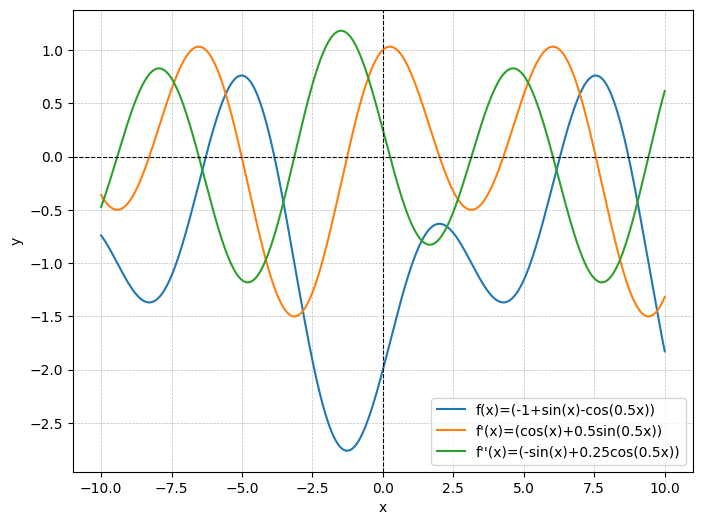

In [16]:
f = SumFunc("f", [ConstFunc("", -1), SinFunc(), CosFunc("",-1, 0.5)])
print(f)
Plottable.multi_plot([f, f.derive(), f.derive().derive()], -10, 10, 1000)

### Produktregel

Eine weitere Art, Funktionen zusammenzusetzen, ist die Multiplikation.

$$ f(x) = g(x) \cdot h(x) \rightarrow f'(x) = g'(x) \cdot h(x) + g(x) \cdot h'(x)$$


Aus einem Produkt entsteht nach der Ableitung also eine Summe aus zwei Produkten.

<div class="aufgabe">
    <h3>Produkt-Funktion</h3>
    <img src="images/sin_times_x_cubed.png" width=260 align=right alt="selfmade" />
    Ergänzen Sie den untenstehenden Code der Klasse <tt>ProdFunc</tt>, die ein Produkt aus zwei anderen Funktionen (<tt>left/right</tt>) ist.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Vorgaben gelten:
    <ul>
    <li><tt>__init__(self, name: str, left: MFunc, right: MFunc, factor: float = 1.0):</tt>: Alle Faktoren aus den beiden übergebenen Funktionen sollen als Faktor in die neue <tt>ProdFunc</tt> gezogen werden  (z.B. <tt>2.0sin(x)*3.0x->6.0sin(x)*x</tt>)
    </li>    
    <li><tt>_str_internal(self) -> str</tt>: Wir verwenden keine zusätzlichen Klammern, da Punkt-vor-Strich gilt.
    </li>    
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion durch Aufruf von <tt>left/right</tt>.
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Das Ergebnis ist immer eine <tt>SumFunc</tt> aus zwei <tt>ProdFunc</tt>. Die Tests erwarten die Reihenfolge aus der Potenzregel.
    </li>
    </ul>
</div>

<details class="hint">
<summary></summary>
Faktoren werden durch Multiplikation miteinander kombiniert.
    <details class="nexthint">
    <summary></summary>
       Wenn Sie wissen, dass die beiden Elemente left und right factor=1.0 haben, wird die Ausgabe leichter.
        <details class="nexthint">
        <summary></summary>
           Erstellen Sie beim Ableiten die einzelnen Komponenten der Produktregel und setzen Sie sie dann zusammen.
        </details>
    </details>
</details>


In [38]:
import unittest

class ProdFunc(MFunc):

    def __init__(self, name: str, left: MFunc, right: MFunc, factor: float = 1.0):
        super().__init__(name, factor)
        self.left = left
        self.right = right

    def _str_internal(self) -> str:
        if self.right.factor != 1: 
            self.left.factor *= self.right.factor
            self.right.factor = 1
        if self.left._str_internal() == "1.0":
            return f"{self.right._str_internal()}"
        return f"{self.left._str_internal()}*{self.right._str_internal()}"

    def _call_internal(self, x: float) -> float:
        return self.left(x) * self.right(x) 

    def derive(self) -> MFunc:
        return SumFunc(self.name + "'", [ProdFunc("", self.left.derive(), self.right, self.factor), ProdFunc("", self.left, self.right.derive(), self.factor)])


class TestProdFunc(unittest.TestCase):
    """
    Unittests für die zusammengestzte Produkt-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f = ProdFunc("f", PowerFunc("", 1.0, 2.0), SinFunc())
        self.g = ProdFunc("g", ExpFunc("", 2.0, 2.0), CosFunc("", 3.0))
        self.h = ProdFunc("h", SinFunc("", -1.0, 0.5), PowerFunc("", -3.0, 1.5))
        
    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(2.0), 3.637189707302727)
        self.assertAlmostEqual(self.f(3.0), 1.2700800725388048)
        self.assertAlmostEqual(self.g(2.0), -136.32508450571538)
        self.assertAlmostEqual(self.g(1.0), 23.953944290647627)
        self.assertAlmostEqual(self.g(-1.0), 0.43873179358835784)
        self.assertAlmostEqual(self.g(2.5), -713.4015292690831)

        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),"f(x)=x^2.0*sin(x)")
        self.assertEqual(str(self.g),"g(x)=6.0e^(2.0x)*cos(x)")
        self.assertEqual(str(self.h),"h(x)=3.0sin(0.5x)*x^1.5")

    def test_03_derive(self):
        """
        Testet einmalige Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()

        self.assertTrue(type(fd) is SumFunc)
        self.assertEqual(len(fd.terms), 2)
        self.assertIn("f'(x)=(", str(fd))
        self.assertIn("2.0x*sin(x)", str(fd))
        self.assertIn("x^2.0*cos(x)", str(fd))
        
        self.assertIn("12.0e^(2.0x)*cos(x)", str(gd))
        self.assertIn("-6.0e^(2.0x)*sin(x)", str(gd))
        self.assertAlmostEqual(gd(0.0), 12.0)

        self.assertIn("1.5cos(0.5x)*x^1.5", str(hd))
        self.assertIn("4.5sin(0.5x)*x^0.5", str(hd))
        self.assertAlmostEqual(hd(math.pi), 7.976042329074822)

    
    #Bonus-Aufgabe
    def test_11_simplify(self):
        """
        Testet Die Vereinfachung/Zusammenfassung des Produkts.
        Benötigt Bonusaufgabe NestedFunc!
        """
        p1 = ProdFunc.simplify(ProdFunc("p", ConstFunc("", 17.0), ConstFunc("", 4.0)))
        self.assertTrue(type(p1) is ConstFunc)
        self.assertAlmostEqual(p1.factor, 68.0)

        p2 = ProdFunc.simplify(ProdFunc("p", PowerFunc("", 1.0, 2.0), PowerFunc("", 1.0, 3.0)))
        self.assertTrue(type(p2) is PowerFunc)
        self.assertAlmostEqual(p2.exponent, 5.0)

        p3 = ProdFunc.simplify(ProdFunc("p", ProdFunc("s", SinFunc("", 2.0, 1.0), ConstFunc("", 4.0)), PowerFunc("", -2.0, 3.0)))
        self.assertTrue(type(p3) is ProdFunc)
        self.assertAlmostEqual(p3.factor, -16.0)
        self.assertTrue(type(p3.left) in (SinFunc, PowerFunc))
        self.assertTrue(type(p3.right) in (SinFunc, PowerFunc))
        self.assertAlmostEqual(p3(1.0), -13.463535756926344)

        p4 = ProdFunc.simplify(ProdFunc("p", SinFunc("", 1.0, 2.0), SinFunc("", 1.0, 2.0)))
        self.assertTrue(type(p4) is NestedFunc)
        self.assertEqual(str(p4), "p(x)=sin(2.0x)^2")

     

    def test_12_derive_and_simplify(self):
        """
        Testet mehrfache Ableitung und simplify.
        """
        fdd= self.f.derive().derive()
        gddd= self.g.derive().derive().derive()
        hdd= self.h.derive().derive()
        
        self.assertEqual(len(fdd.terms), 3)
        self.assertIn("f''(x)=(", str(fdd))
        self.assertIn("2.0sin(x)", str(fdd))
        self.assertIn("4.0x*cos(x)", str(fdd))
        self.assertIn("x^2.0*sin(x)", str(fdd))

        self.assertEqual(len(gddd.terms), 2)
        self.assertIn("12.0e^(2.0x)*cos(x)", str(gddd))
        self.assertIn("-66.0e^(2.0x)*sin(x)", str(gddd))

        self.assertEqual(len(hdd.terms), 3)
        self.assertIn("-0.75sin(0.5x)*x^1.5", str(hdd))
        self.assertIn("4.5cos(0.5x)*x^0.5", str(hdd))
        self.assertIn("2.25sin(0.5x)*x^-0.5", str(hdd))


if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestProdFunc("test_01_call"))
    suite.addTest(TestProdFunc("test_02_str"))
    suite.addTest(TestProdFunc("test_03_derive"))
    #Bonus-Aufgabe
    #suite.addTest(TestProdFunc("test_11_simplify"))
    #suite.addTest(TestProdFunc("test_12_derive_and_simplify"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


Error at (x)=x^4 -12.566370614359172
Error at (x)=x^4 -12.312504541341815
Error at (x)=x^4 -12.058638468324459
Error at (x)=x^4 -11.8047723953071
Error at (x)=x^4 -11.550906322289745
Error at (x)=x^4 -11.297040249272387
Error at (x)=x^4 -11.04317417625503
Error at (x)=x^4 -10.789308103237673
Error at (x)=x^4 -10.535442030220317
Error at (x)=x^4 -10.281575957202959
Error at (x)=x^4 -10.027709884185603
Error at (x)=x^4 -9.773843811168245
Error at (x)=x^4 -9.519977738150889
Error at (x)=x^4 -9.266111665133531
Error at (x)=x^4 -9.012245592116175
Error at (x)=x^4 -8.758379519098817
Error at (x)=x^4 -8.50451344608146
Error at (x)=x^4 -8.250647373064103
Error at (x)=x^4 -7.996781300046746
Error at (x)=x^4 -7.742915227029389
Error at (x)=x^4 -7.489049154012032
Error at (x)=x^4 -7.235183080994675
Error at (x)=x^4 -6.981317007977318
Error at (x)=x^4 -6.727450934959961
Error at (x)=x^4 -6.473584861942604
Error at (x)=x^4 -6.219718788925246
Error at (x)=x^4 -5.965852715907889
Error at (x)=x^4 -5.7

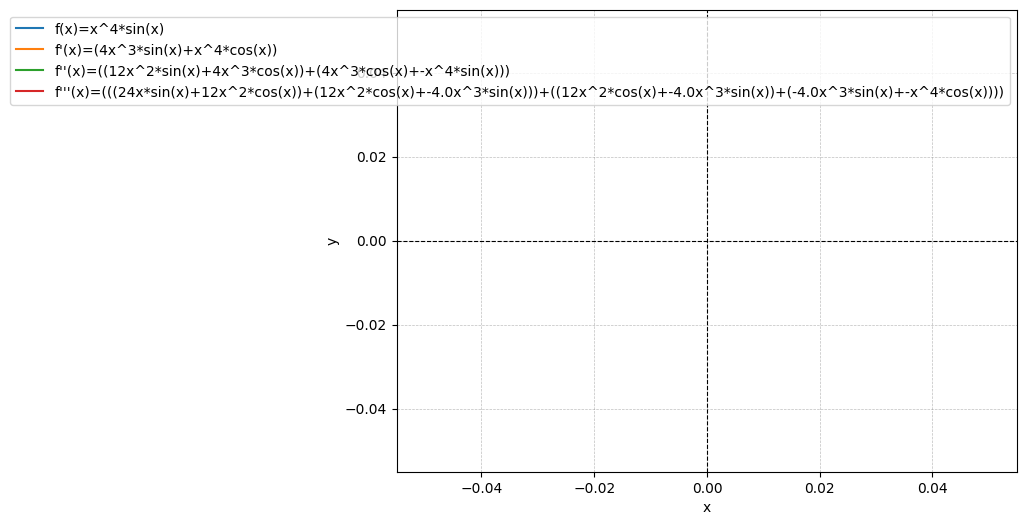

In [18]:
f = ProdFunc("f", PowerFunc("",1,4), SinFunc())
Plottable.multi_plot([f, 
                      f.derive(), 
                      f.derive().derive(),
                      f.derive().derive().derive()],
                     -4.0*math.pi, 4.0*math.pi)

### Bonus: Kettenregel <img src="images/bonusstar223679.png" width=40 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />

Bei verketteten Funktionen dient eine innere Funktion als Operand einer äußeren Funktion.

$$ 
f(x) = g(h(x)) \rightarrow f'(x) = g'(h(x)) \cdot h'(x)
$$
    Mehrere der bisher gezeigten Regeln sind Spezialfälle der Kettenregel, z.B.
$$
    f(x) = sin(c \cdot x), \text{ mit } g(x) = sin(x), h(x) = c \cdot x
$$
$$
\rightarrow g'(x) = cos(x), h'(x) = c, f'(x) = cos(h(x)) \cdot c = cos(c \cdot x) \cdot c
$$

Der Schlüssel zur Anwendung der Kettenregel ist es, eine Funktion geschickt in die äußere und innere Funktion zu zerlegen.

<div class="aufgabe">
    <img src="images/bonusstar223679.png" width=80 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />
    <h3>Verkettete Funktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>NestedFunc</tt>, die eine Verkettung einer äußeren und einer inneren Funktion (<tt>outer/inner</tt>) ist.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Vorgaben gelten:
    <ul>
    <li><img src="images/cos_cubed.png" width=220 align=right alt="selfmade" /><tt>__init__(self, name: str, outer: MFunc, inner: MFunc, factor: float = 1.0):</tt>: Der Faktor der äußeren Funktion wird als Faktor der neuen <tt>NestedFunc</tt> verwendet. Die innere Funktion dient als Operand der äußeren. (z.B. <tt>2.0sin(x)/1.5x^2->sin(1.5x^2)</tt>)
    </li>    
    <li><tt>_str_internal(self) -> str</tt>: Die innere Funktion dient als Operand der äußeren.
    </li>    
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion durch Aufruf von <tt>inner</tt>, dann <tt>outer</tt>.
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Das Ergebnis ist immer eine <tt>ProdFunc</tt> aus einer <tt>NestedFunc</tt> und einer anderen. Ausnahmen:<br> Ist die äußere Funktion eine Potenz, fällt sie ggfs weg (z.B. <tt>h(x)^2.0->h(x)^1.0</tt>).<br> Ist die innere Ableitung eine Konstante, wird sie stattdessen als Faktor geführt. <tt>g'(h(x))*2.0->2.0g'(h(x))
    </li>
    </ul>
</div> 

<details class="hint">
<summary></summary>
Das Attribut operand wirkt sich lediglich auf die String-Ausgabe aus. Was Sie nicht ausgeben, muss keinen schönen Operanden haben.
    <details class="nexthint">
    <summary></summary>
       Erstellen Sie bei der Ableitung genau die einzelnen Elemente der Kettenregel und setzen Sie sie neu zusammen.
        <details class="nexthint">
        <summary></summary>
           Wenn Sie die ProdFunc richtig implementiert haben, sollten die Faktoren automatisch vorne landen.
        </details>
    </details>
</details>


<div class="remark">
    <h3>Zeit zum Refactoring...</h3>
    <p>
    Mit der Kettenregel könnten wir rückblickend unsere bestehenden Klassen vereinfachen.<br>
    So könnten die "inneren" Faktoren bei Sinus, Cosinus, und $e$-Funktion wegfallen.<br>
    Im Sinne der Übung sparen wir uns das aber und lassen diese überflüssigen Faktoren stattdessen einfach ungenutzt.
    </p>
</div>

In [39]:
import unittest

class NestedFunc(MFunc):

    def __init__(self, name: str, outer: MFunc, inner: MFunc, factor: float = 1.0):
        super().__init__(name, factor)
        self.outer = outer
        self.inner = inner

    def _str_internal(self) -> str:
        self.outer.operand = self.inner._str_internal()
        return self.outer._str_internal()

    def _call_internal(self, x: float) -> float:
        return self.outer(self.inner(x))

    def derive(self) -> MFunc:  
        d_outer = self.outer.derive()
        d_inner = self.inner.derive()
        new_outer = NestedFunc("", d_outer, self.inner.clone())  # Außen abgeleitet, innen gleich
        return ProdFunc(self.name + "'", new_outer, d_inner, self.factor)


class TestNestedFunc(unittest.TestCase):
    """
    Unittests für die verkettete Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f = NestedFunc("f", PowerFunc("", 1.0, 2.0), SinFunc())
        self.g = NestedFunc("g", CosFunc("", 3.0), ProdFunc("",  PowerFunc("", 1.0, 1.0), ExpFunc("", 1.0, 1.0)) )
        self.h = NestedFunc("h", ExpFunc("", 2.0, 1.0), SumFunc("", [SinFunc(), CosFunc()]) )
        
    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(0.0), 0.0)
        self.assertAlmostEqual(self.f(1.0), 0.7080734182735712)
        self.assertAlmostEqual(self.g(2.0), -1.7938600825330877)
        self.assertAlmostEqual(self.g(-1.0), 2.7992762267946256)
        self.assertAlmostEqual(self.h(-1.0), 1.479905895481268)
        self.assertAlmostEqual(self.h(0.0), 5.43656365691809)

        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),"f(x)=sin(x)^2.0")
        self.assertEqual(str(self.g),"g(x)=3.0cos(x*e^x)")
        self.assertEqual(str(self.h),"h(x)=2.0e^((sin(x)+cos(x)))")

    def test_03_derive(self):
        """
        Testet einmalige Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()

        self.assertTrue(type(fd) is ProdFunc)
        self.assertEqual(str(fd), "f'(x)=2.0sin(x)*cos(x)")
        self.assertAlmostEqual(fd(1.0), 0.9092974268256818)
        
        self.assertEqual(str(gd), "g'(x)=-3.0sin(x*e^x)*(e^x+x*e^x)")
        self.assertAlmostEqual(gd(1.0), -6.699715904670079)

        self.assertEqual(str(hd), "h'(x)=2.0e^((sin(x)+cos(x)))*(cos(x)-sin(x))")
        self.assertAlmostEqual(hd(1.0), -2.398481179592898)

    
    #Ultimative Bonus-Aufgabe - kombiniert alle bisherigen Bonus-Aufgaben (SumFunc und ProdFunc)
    def test_11_derive_and_simplify(self):
        """
        Testet mehrfache Ableitung und simplify.
        """
        fdd= self.f.derive().derive()
        gdd= self.g.derive().derive()
        hdd= self.h.derive().derive()
        
        self.assertEqual(len(fdd.terms), 2)
        self.assertEqual(str(fdd), "f''(x)=(2.0cos(x)^2-2.0sin(x)^2)")
        self.assertAlmostEqual(fdd(2.0), -1.3072872417272239)

        self.assertEqual(len(gdd.terms), 2)
        self.assertIn("-3.0cos(x*e^x)*(e^x+x*e^x)^2", str(gdd))
        self.assertIn("-3.0sin(x*e^x)*(2.0e^x+x*e^x)", str(gdd))
        self.assertAlmostEqual(gdd(1.0), 70.79266266689739)

        self.assertEqual(len(hdd.terms), 2)
        self.assertIn("2.0e^((sin(x)+cos(x)))*(cos(x)-sin(x))^2", str(hdd))
        self.assertIn("2.0e^((sin(x)+cos(x)))*(-sin(x)-cos(x))", str(hdd))
        self.assertAlmostEqual(hdd(0.0), 0.0)




if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestNestedFunc("test_01_call"))
    suite.addTest(TestNestedFunc("test_02_str"))
    suite.addTest(TestNestedFunc("test_03_derive"))
    #Bonus-Aufgabe
    #suite.addTest(TestNestedFunc("test_11_derive_and_simplify"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


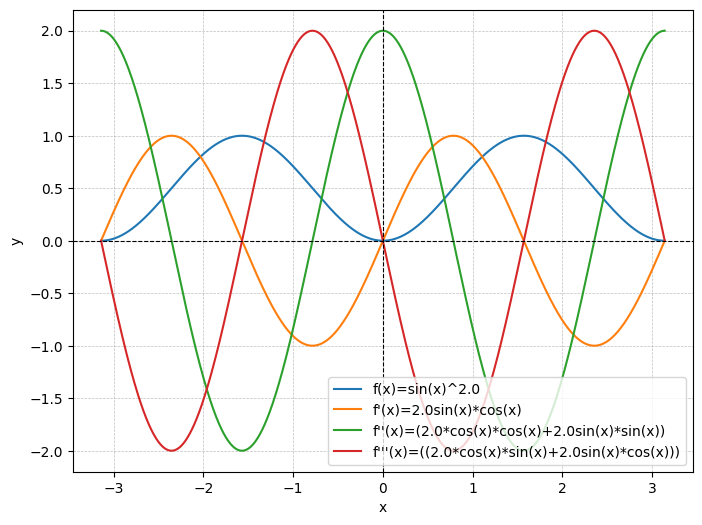

In [40]:
f = NestedFunc("f", PowerFunc("", 1.0, 2.0), SinFunc())
Plottable.multi_plot([f, 
                      f.derive(), 
                      f.derive().derive(),
                      f.derive().derive().derive()],
                      -math.pi, math.pi, 1000)

<div class="aufgabe">
    <h3> Produkt-Vereinfachung (schwer!)</h3>
    <img src="images/bonusstar223679.png" width=80 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />
    Ergänzen Sie eine statische Methode <tt>ProdFunc.simplify(infunc: ProdFunc) -> MFunc</tt>, die eine übergebene Produktfunktion vereinfacht:<br>
    <ul>
        <li>Mehrere gleiche Multiplikanden werden zu Exponenten (z.B. <tt>cos(x)*cos(x)->cos(x)^2.0</tt>)</li>
        <li>Kompatible Potenzen werden zusammengefasst (z.B. <tt>x^2.0*x^3.0->x^5.0</tt>)</li>
        <li>Konstantenfunktionen werden in den Faktor gezogen (z.B. <tt>2.0sin(x)*2.0->4.0sin(x)</tt>)</li>
        <li>Faktoren werden zusammengefasst, Konstanten in Potenzen ausmultipliziert (z.B. <tt>2.0(2.0x)^2->4.0x^2</tt>) </li>
        <li>Verbleibt nur ein Multiplikant, wird dieser direkt zurückgegeben (keine Produktfunktion)</li>
        <li>Verbleibt kein Multiplikant, wird eine Konstantenfunktion zurückgegeben</li>
    </ul>
    Alle diese Vereinfachungen sollen auch über mehrere ineinander verschachtelte Produkte hinweg umgesetzt werden.<br>
    Verwenden Sie diese Methode überall dort, wo Sie eine Produktfunktion erstellen.<br>
    Stellen Sie sicher, dass die zugehörigen Tests in <tt>ProdFunc</tt> und <tt>NestedFunc</tt> durchlaufen.
</div>

<details class="hint">
<summary></summary>
Sie brauchen vermutlich Rekursion.
    <details class="nexthint">
    <summary></summary>
       Versuchen Sie zunächst, alle Multiplikanden der verschachtelten ProdFunc zu finden und geordnet wieder zusammenzusetzen. Verwenden Sie ein Dictionary.
        <details class="nexthint">
        <summary></summary>
           Implementieren Sie dann Schritt für Schritt die genannten Ersetzungen anhand der Tests.
        </details>
    </details>
</details>


# Footer

In [21]:
#Ausführen, um den aktuellen Footer anzuzeigen
from IPython.display import HTML
HTML(filename='files/footer.html')